# Diabetes Prediction Model

Import necessary libraries

In [47]:
#matplotlib inline 
import pandas as pd
import sklearn
import seaborn as sns
import json
import numpy as np
import os
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.display import Image


In [84]:
from sklearn.impute import SimpleImputer #takes care of missing values
from sklearn import preprocessing #standardizes data
from sklearn.model_selection import train_test_split #to split data into training and test sets
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics


Import data from IBM Cloud Object Storage

In [85]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1b26b11f43874dcbbacee0e8d9073d64 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='HbIeSe2SektXoBcW9R58-jsxfJ26LCxnvd_FeqodVocd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1b26b11f43874dcbbacee0e8d9073d64.get_object(Bucket='diabetedpredictionsystem-donotdelete-pr-kx7a397umcby00',Key='diabetes.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_or = df_data_1
df_or.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [86]:

body = client_1b26b11f43874dcbbacee0e8d9073d64.get_object(Bucket='diabetedpredictionsystem-donotdelete-pr-kx7a397umcby00',Key='data_asset/diabetes_csv_edited_dtw8e1xmoul9vquxzn5coxtp9')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_ed = df_data_2
df_ed.head(20)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,33.6,0.627,50,1
1,1,85.0,66.0,26.6,0.351,31,0
2,8,183.0,64.0,23.3,0.672,32,1
3,1,89.0,66.0,28.1,0.167,21,0
4,0,137.0,40.0,43.1,2.288,33,1
5,5,116.0,74.0,25.6,0.201,30,0
6,3,78.0,50.0,31.0,0.248,26,1
7,10,115.0,NaN,35.3,0.134,29,0
8,2,197.0,70.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,0.232,54,1


In [87]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
Pregnancies                 768 non-null int64
Glucose                     763 non-null float64
BloodPressure               733 non-null float64
BMI                         757 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(4), int64(3)
memory usage: 42.1 KB


In [88]:
df_or.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [89]:
df_ed.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [90]:
df_ed.describe()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f31d0956128>,
      dtype=object)

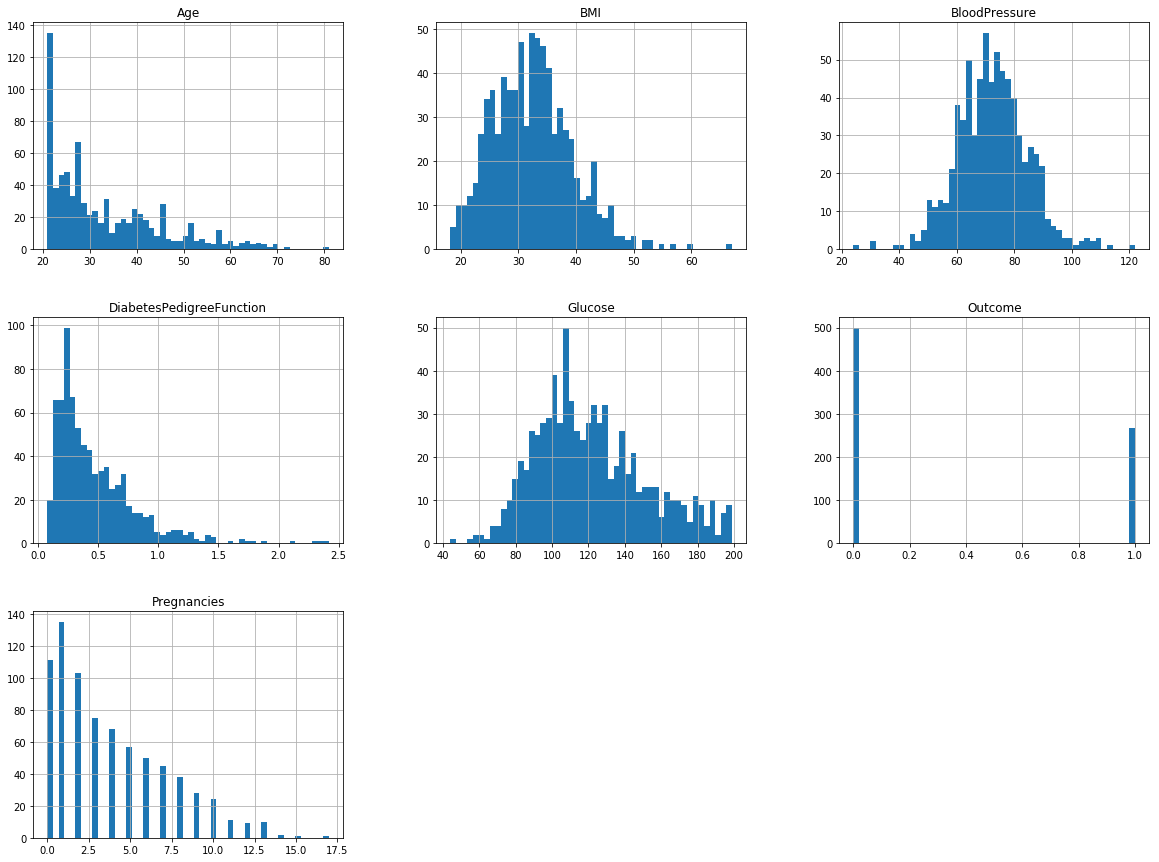

In [91]:
df_ed.hist(bins=50,figsize=(20,15))

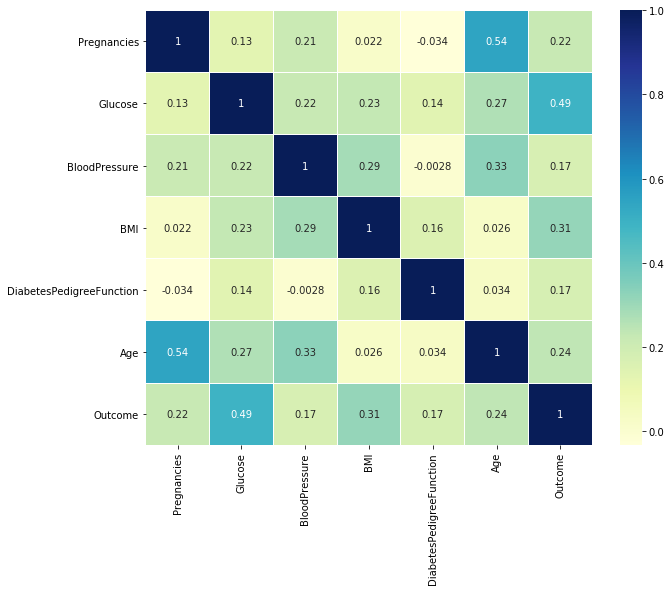

In [92]:
corr_mat = df_ed.corr() #correlation matrix - shows how the variables are correlated
#print(corr_mat)
f, ax = plt.subplots(figsize =(10, 8)) 
sns.heatmap(corr_mat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

In [103]:
#define the output vector
y = df_ed.Outcome
#define the feature matrix
X = df_ed.copy()
X.drop(['Outcome'], axis=1, inplace=True)
X.head()


,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,33.6,0.627,50
1,1,85.0,66.0,26.6,0.351,31
2,8,183.0,64.0,23.3,0.672,32
3,1,89.0,66.0,28.1,0.167,21
4,0,137.0,40.0,43.1,2.288,33


In [104]:
mmscaler = preprocessing.MinMaxScaler()
mm_val = X.values[:,[0,4,5]].astype(float)
mm_scaled_val = mmscaler.fit_transform(mm_val)
preg = mm_scaled_val[:,0]
ped = mm_scaled_val[:,1]
age = mm_scaled_val[:,2]

In [105]:
scaler = preprocessing.StandardScaler()
values = X.values[:,[1,2,3]].astype(float)
values_scaled = scaler.fit_transform(values)
gluc = values_scaled[:,0]
bp = values_scaled[:,1]
bmi = values_scaled[:,2]

In [110]:
data = {'Pregnancies':preg,'Glucose':gluc,'BloodPressure':bp,'BMI':bmi,'DiabetesPedigreeFunction':ped,'Age':age}
X = pd.DataFrame(data)
#X.head()
#X.info()
X.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
dtype: int64

In [107]:
#splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) 

In [115]:
from sklearn.impute import SimpleImputer
data_imputer = SimpleImputer() #takes care of NaN
imputed_X_train = pd.DataFrame(data_imputer.fit_transform(X_train))
imputed_X_test = pd.DataFrame(data_imputer.transform(X_test))
imputed_X_train.columns = X_train.columns
imputed_X_test.columns = X_test.columns

In [123]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
gradient_boost = GradientBoostingClassifier()
random_forest = RandomForestClassifier(n_estimators=10)
svc_model = SVC(gamma='auto')
k_neighbors = KNeighborsClassifier()
logistic_regression = LogisticRegression(max_iter=500,solver='lbfgs')

In [118]:
gradient_boost.fit(imputed_X_train,y_train)
y_pred = gradient_boost.predict(imputed_X_test)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)) 

model accuracy: 0.8246753246753247


In [119]:
random_forest.fit(imputed_X_train,y_train)
y_pred = random_forest.predict(imputed_X_test)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)) 

model accuracy: 0.7727272727272727


In [120]:
svc_model.fit(imputed_X_train,y_train)
y_pred = svc_model.predict(imputed_X_test)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)) 

model accuracy: 0.7792207792207793


In [121]:
k_neighbors.fit(imputed_X_train,y_train)
y_pred = k_neighbors.predict(imputed_X_test)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)) 

model accuracy: 0.7402597402597403


In [124]:
logistic_regression.fit(imputed_X_train,y_train)
y_pred = logistic_regression.predict(imputed_X_test)
print("model accuracy:", metrics.accuracy_score(y_test, y_pred)) 

model accuracy: 0.7597402597402597


In [128]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(imputed_X_train, y_train)
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').